In [36]:
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
file_path = 'financial_loan.csv'
data = pd.read_csv(file_path)

data.head()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,11-02-2021,13-09-2021,13-04-2021,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,01-01-2021,14-12-2021,15-01-2021,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,05-01-2021,12-12-2021,09-01-2021,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,25-02-2021,12-12-2021,12-03-2021,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,01-01-2021,14-12-2021,15-01-2021,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     38576 non-null  int64  
 1   address_state          38576 non-null  object 
 2   application_type       38576 non-null  object 
 3   emp_length             38576 non-null  object 
 4   emp_title              37138 non-null  object 
 5   grade                  38576 non-null  object 
 6   home_ownership         38576 non-null  object 
 7   issue_date             38576 non-null  object 
 8   last_credit_pull_date  38576 non-null  object 
 9   last_payment_date      38576 non-null  object 
 10  loan_status            38576 non-null  object 
 11  next_payment_date      38576 non-null  object 
 12  member_id              38576 non-null  int64  
 13  purpose                38576 non-null  object 
 14  sub_grade              38576 non-null  object 
 15  te

In [39]:
missing_values = data.isnull().sum()

data['issue_date'] = pd.to_datetime(data['issue_date'], format='%d-%m-%Y')
data['last_credit_pull_date'] = pd.to_datetime(data['last_credit_pull_date'], format='%d-%m-%Y')
data['last_payment_date'] = pd.to_datetime(data['last_payment_date'], format='%d-%m-%Y')

data['emp_length'] = data['emp_length'].replace(
    {'< 1 year': '0 years', '10+ years': '10 years'}).str.extract('(\d+)').astype(float)

missing_values, data.dtypes.head(), data.head()


<>:8: SyntaxWarning: invalid escape sequence '\d'
<>:8: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Raunak Das\AppData\Local\Temp\ipykernel_13612\3533314454.py:8: SyntaxWarning: invalid escape sequence '\d'
  {'< 1 year': '0 years', '10+ years': '10 years'}).str.extract('(\d+)').astype(float)


(id                          0
 address_state               0
 application_type            0
 emp_length                  0
 emp_title                1438
 grade                       0
 home_ownership              0
 issue_date                  0
 last_credit_pull_date       0
 last_payment_date           0
 loan_status                 0
 next_payment_date           0
 member_id                   0
 purpose                     0
 sub_grade                   0
 term                        0
 verification_status         0
 annual_income               0
 dti                         0
 installment                 0
 int_rate                    0
 loan_amount                 0
 total_acc                   0
 total_payment               0
 dtype: int64,
 id                    int64
 address_state        object
 application_type     object
 emp_length          float64
 emp_title            object
 dtype: object,
         id address_state application_type  emp_length              emp_title  \

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     38576 non-null  int64         
 1   address_state          38576 non-null  object        
 2   application_type       38576 non-null  object        
 3   emp_length             38576 non-null  float64       
 4   emp_title              37138 non-null  object        
 5   grade                  38576 non-null  object        
 6   home_ownership         38576 non-null  object        
 7   issue_date             38576 non-null  datetime64[ns]
 8   last_credit_pull_date  38576 non-null  datetime64[ns]
 9   last_payment_date      38576 non-null  datetime64[ns]
 10  loan_status            38576 non-null  object        
 11  next_payment_date      38576 non-null  object        
 12  member_id              38576 non-null  int64         
 13  p

In [41]:
data['next_payment_date'] = pd.to_datetime(data['next_payment_date'], format='%d-%m-%Y')

data.dtypes['next_payment_date'], data.head()


(dtype('<M8[ns]'),
         id address_state application_type  emp_length              emp_title  \
 0  1077430            GA       INDIVIDUAL         0.0                  Ryder   
 1  1072053            CA       INDIVIDUAL         9.0         MKC Accounting   
 2  1069243            CA       INDIVIDUAL         4.0  Chemat Technology Inc   
 3  1041756            TX       INDIVIDUAL         0.0    barnes distribution   
 4  1068350            IL       INDIVIDUAL        10.0          J&J Steel Inc   
 
   grade home_ownership issue_date last_credit_pull_date last_payment_date  \
 0     C           RENT 2021-02-11            2021-09-13        2021-04-13   
 1     E           RENT 2021-01-01            2021-12-14        2021-01-15   
 2     C           RENT 2021-01-05            2021-12-12        2021-01-09   
 3     B       MORTGAGE 2021-02-25            2021-12-12        2021-03-12   
 4     A       MORTGAGE 2021-01-01            2021-12-14        2021-01-15   
 
    ... sub_grade      

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     38576 non-null  int64         
 1   address_state          38576 non-null  object        
 2   application_type       38576 non-null  object        
 3   emp_length             38576 non-null  float64       
 4   emp_title              37138 non-null  object        
 5   grade                  38576 non-null  object        
 6   home_ownership         38576 non-null  object        
 7   issue_date             38576 non-null  datetime64[ns]
 8   last_credit_pull_date  38576 non-null  datetime64[ns]
 9   last_payment_date      38576 non-null  datetime64[ns]
 10  loan_status            38576 non-null  object        
 11  next_payment_date      38576 non-null  datetime64[ns]
 12  member_id              38576 non-null  int64         
 13  p

In [43]:
total_loan_applications = data.shape[0]
print(total_loan_applications)


38576


In [46]:
december_data = data[data['issue_date'].dt.month == 12]
december_applications = december_data['id'].count()

total_applications = december_data['id'].count()

total_applications

4314

In [47]:
november_data = data[data['issue_date'].dt.month == 11]
november_applications = november_data['id'].count()

if november_applications != 0:
     mom_change = round(((december_applications - november_applications) / november_applications) * 100, 1)
else:
    mom_change = None 

december_applications, november_applications, mom_change

(4314, 4035, 6.9)

In [48]:
december_data = data[data['issue_date'].dt.month == 12]
december_funded_amount = december_data['loan_amount'].sum()

november_data = data[data['issue_date'].dt.month == 11]
november_funded_amount = november_data['loan_amount'].sum()

if november_funded_amount != 0:
    mom_funded_change = round(((december_funded_amount - november_funded_amount) / november_funded_amount) * 100, 1)
else:
    mom_funded_change = None 


december_funded_amount, november_funded_amount, mom_funded_change

(53981425, 47754825, 13.0)

In [49]:
december_data = data[data['issue_date'].dt.month == 12]
december_total_received = december_data['total_payment'].sum()

november_data = data[data['issue_date'].dt.month == 11]
november_total_received = november_data['total_payment'].sum()

if november_total_received != 0:
    mom_received_change = round(((december_total_received - november_total_received) / november_total_received) * 100, 1)
else:
    mom_received_change = None 

december_total_received, november_total_received, mom_received_change

(58074380, 50132030, 15.8)

In [50]:
overall_avg_int_rate = data['int_rate'].mean() * 100

december_data = data[data['issue_date'].dt.month == 12]
december_avg_int_rate = december_data['int_rate'].mean() * 100

november_data = data[data['issue_date'].dt.month == 11]
november_avg_int_rate = november_data['int_rate'].mean() * 100

if november_avg_int_rate != 0:
    mom_int_rate_change = round(((december_avg_int_rate - november_avg_int_rate) / november_avg_int_rate) * 100, 1)
else:
    mom_int_rate_change = None 

overall_avg_int_rate, december_avg_int_rate, november_avg_int_rate, mom_int_rate_change

(12.048831397760265, 12.356040797403804, 11.94171747211896, 3.5)

In [51]:
overall_avg_dti = data['dti'].mean() * 100

december_data = data[data['issue_date'].dt.month == 12]
december_avg_dti = december_data['dti'].mean() * 100

november_data = data[data['issue_date'].dt.month == 11]
november_avg_dti = november_data['dti'].mean() * 100

if november_avg_dti != 0:
    mom_dti_change = round(((december_avg_dti - november_avg_dti) / november_avg_dti) * 100, 1)
else:
    mom_dti_change = None  

overall_avg_dti, december_avg_dti, november_avg_dti, mom_dti_change

(13.327433119037742, 13.665537783959206, 13.302733581164809, 2.7)

In [52]:
good_loan_statuses = ["Current", "Fully Paid"]

good_loans = data[data['loan_status'].isin(good_loan_statuses)]
good_loans_count = good_loans.shape[0]

total_loans_count = data.shape[0]

if total_loans_count != 0:
    good_loan_percentage = round((good_loans_count / total_loans_count) * 100, 1)
else:
    good_loan_percentage = None 
    
good_loans_count, total_loans_count, good_loan_percentage

(33243, 38576, 86.2)

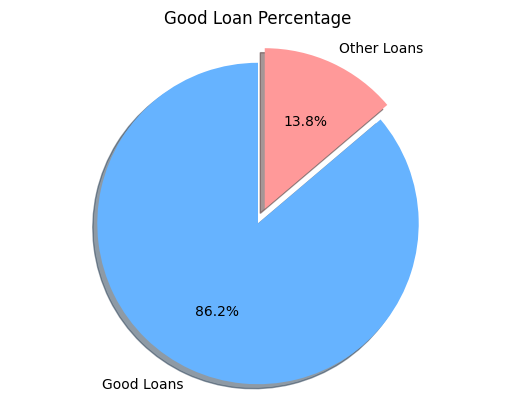

In [53]:
bad_loan_percentage = 100 - good_loan_percentage

labels = ['Good Loans', 'Other Loans']
sizes = [good_loan_percentage, bad_loan_percentage]
colors = ['#66b3ff', '#ff9999']
explode = (0.1, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  

plt.title('Good Loan Percentage')

plt.show()

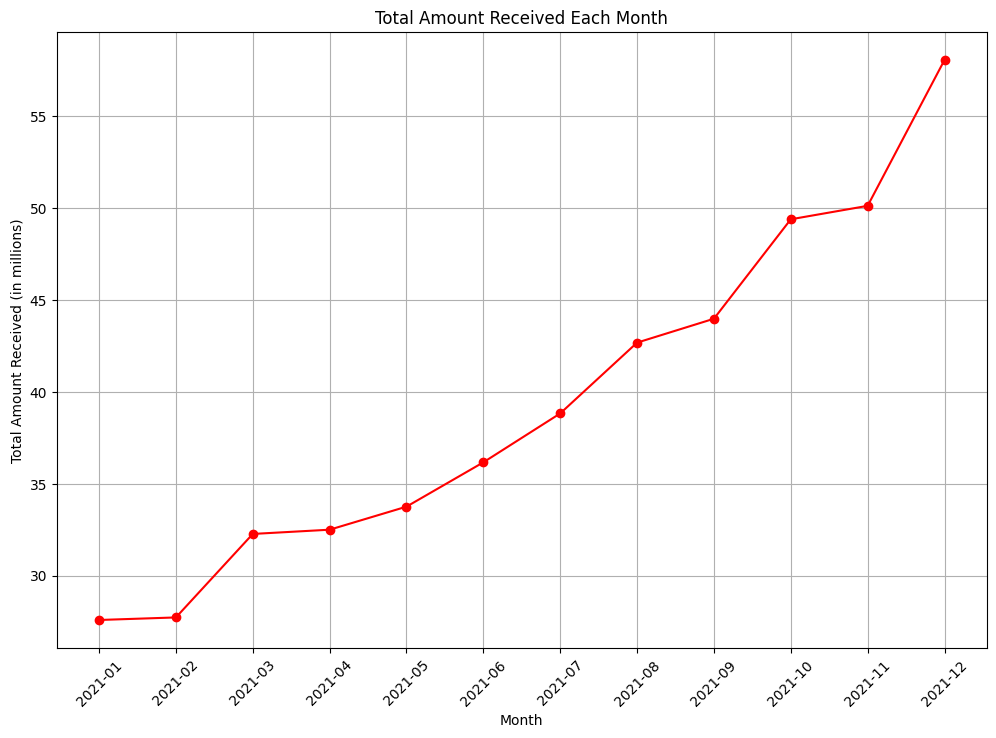

In [54]:
data['year_month'] = data['issue_date'].dt.to_period('M')

monthly_total_received = data.groupby('year_month')['total_payment'].sum()

monthly_total_received_millions = monthly_total_received / 1e6


plt.figure(figsize=(12, 8))
plt.plot(monthly_total_received_millions.index.astype(str), monthly_total_received_millions.values, marker='o', linestyle='-', color='r')
plt.title('Total Amount Received Each Month')
plt.xlabel('Month')
plt.ylabel('Total Amount Received (in millions)')
plt.xticks(rotation=45)  
plt.grid(True)
plt.show()

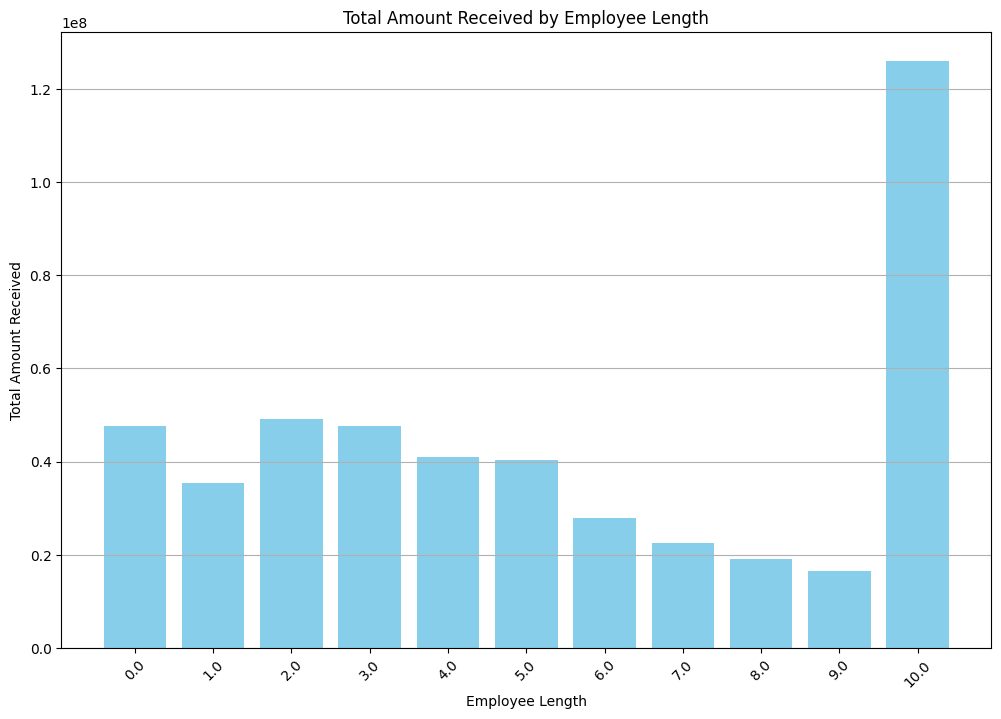

In [55]:
employee_length_total_received = data.groupby('emp_length')['total_payment'].sum()

employee_length_total_received = employee_length_total_received.sort_index()

plt.figure(figsize=(12, 8))
plt.bar(employee_length_total_received.index.astype(str), employee_length_total_received.values, color='skyblue')
plt.title('Total Amount Received by Employee Length')
plt.xlabel('Employee Length')
plt.ylabel('Total Amount Received')
plt.xticks(rotation=45)  
plt.grid(axis='y')
plt.show()

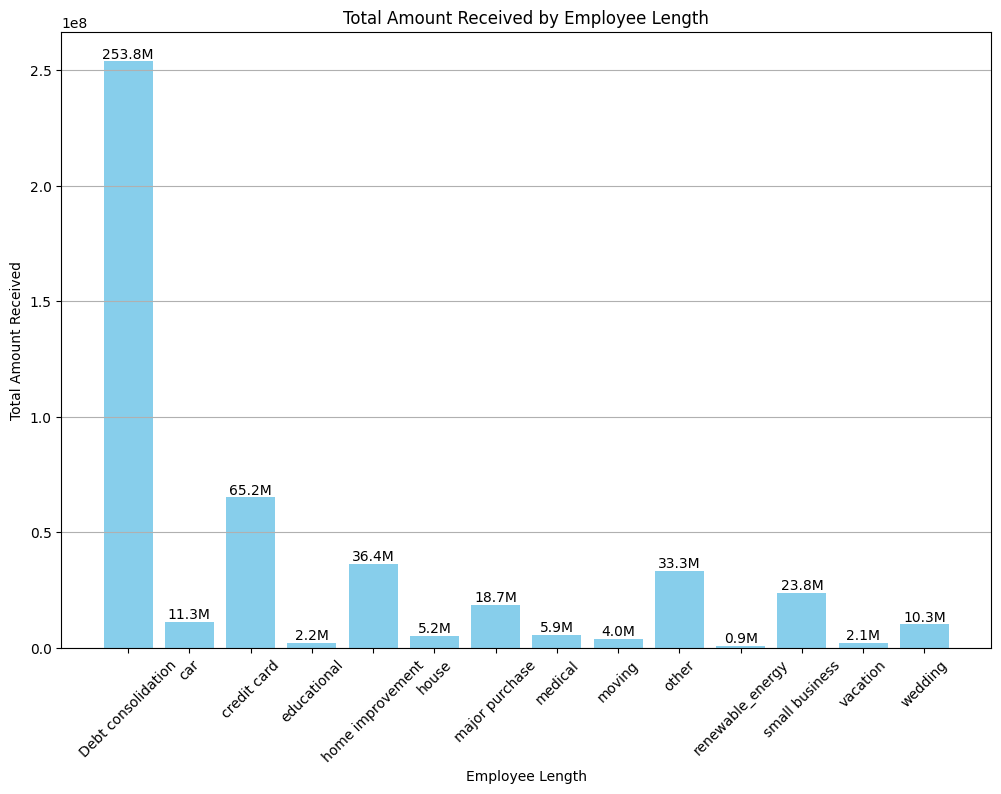

In [56]:
employee_length_total_received = data.groupby('purpose')['total_payment'].sum()

employee_length_total_received = employee_length_total_received.sort_index()

plt.figure(figsize=(12, 8))
bars = plt.bar(employee_length_total_received.index.astype(str), employee_length_total_received.values, color='skyblue')
plt.title('Total Amount Received by Employee Length')
plt.xlabel('Employee Length')
plt.ylabel('Total Amount Received')
plt.xticks(rotation=45) 
plt.grid(axis='y')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval / 1e6:.1f}M', ha='center', va='bottom')

plt.show()